# Research Project: Sentiment Analysis in Social Media using Machine Learning
**By: Husam Ahmed**   

**Research Project introduction**:


With the rising of social media platforms in the past 15 years, these platforms have become a haven for customers to express their thoughts and opinions regarding products and services;

It is often in businesses’ interest to understand the feedback from the demographic they provide services for to provide satisfactory services and products that are not only pleasing to the business but also meet the needs of an existing demographic.

How do customers feel about your product? And is it possible to understand what customers think of provided services or products without having to spend many resources to manually investigate each customer’s feedback? The answer is a resounding yes; with the help of sentiment analysis.  


**Research Aim:** Developing an optimal sentiment analysis model based on social medial data through experimenting and making comparisons using the below techniques:
* Feature Extraction using Word2Vec and TF-IDF.
* Text classification using SVM, Random Forest, and Logistic Regression.



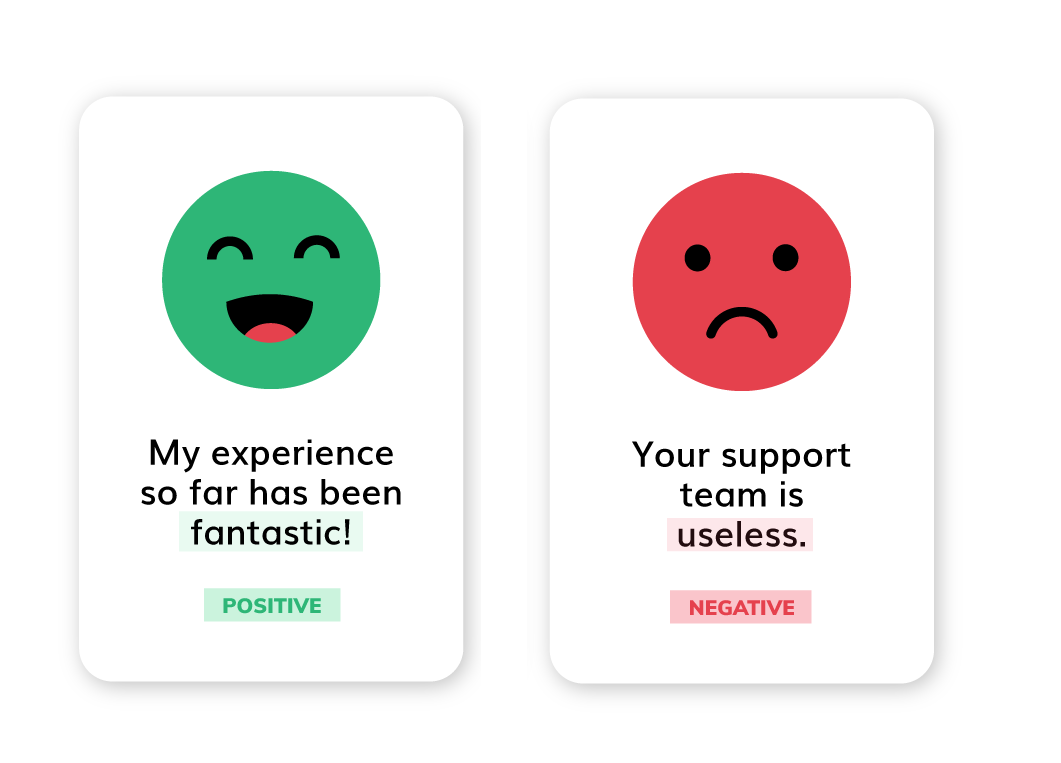

## Table of Contents
### 1- Initial Steps:
* [Importing libraries.](#cell-id)
* [Downloading the dataset.](#download-id)
* [Inspecting the dataset.](#inspect-id)

### 2- Data Pre-processing:

* [Data cleaning (removing links, punctuations, numbers, mentions, stop words, etc.).](#clean-id)
* [Tokenization.](#token-id)
* [Lemmatization.](#lemma-id)
* [Stemming.](#stem-id)

### 3- Machine learning models development:
<li> Using TF_IDF feature extraction: </li>

* [Logistic Regression.](#log1-id)
* [Random Forest.](#rand1-id)
* [Support Vector Machine.](#svm1-id)
* [Visual comparison of the models' accuracies.](#viz1-id)

<li> Using Word2Vec feature extraction: </li>

* [Logistic Regression.](#log2-id)
* [Random Forest.](#rand2-id)
* [Support Vector Machine.](#svm2-id)
* [Visual comparison of the models' accuracies.](#viz2-id)




## 1- Initial Steps:

<a name="cell-id"></a>
### Importing the required libraries:

In [ ]:
#Importing libraries:
#Data Manipulation and Visualization:
import pandas as pd #data manipulation
import numpy as np #fast computations
import matplotlib.pyplot as plt #plotting data (general)
%matplotlib inline
from wordcloud import WordCloud #plotting (word cloud)
import seaborn as sns #plotting


#Utilities:
import os
import gensim
from google.colab import drive
import time
from gensim.models import KeyedVectors


#Text Preprocessing:
import string
import re #regular expressions handling
import nltk
import gensim #to load google's word2vec model
import gensim.downloader as api
nltk.download('stopwords')
from nltk.corpus import stopwords #stopwrds handling
from nltk.tokenize import RegexpTokenizer  #tokenizing words
from nltk.tokenize import word_tokenize #tokenizing words
nltk.download('punkt') #downloading the Punkt models for word tokenizing in NLTK
from nltk.stem import WordNetLemmatizer  #Lemmatizing words
from nltk.stem import SnowballStemmer #Stemming words
from nltk.stem import PorterStemmer #Stemming words
from sklearn.feature_extraction.text import TfidfVectorizer #feature extraction using TF-IDF (Research Question 2)
from gensim.models.word2vec import Word2Vec #feature extraction using Word2Vec (Research Question 2)
from sklearn.model_selection import train_test_split #train/test data splitting

#Machine learning modelling libraries:
from sklearn.metrics import accuracy_score, classification_report #Accuracy score testing
from sklearn.metrics import confusion_matrix #Performance evaluation
from sklearn.svm import SVC #Support Vector Machine classifier (Research Question 1)
from sklearn.linear_model import LogisticRegression #Logistic Regression classifier (Research Question 1)
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier (Research Question 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<a name="download-id"></a>
### Downloading the dataset directly from kaggle.com using kaggle API:

In [ ]:
#Installing "kaggle" library in order to be able to download datasets directly from kaggle.com
! pip install -q kaggle

In [ ]:
#Importing the kaggle API credentials (available in the appendix part of the dissertation)
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arcanepersona","key":"8017247465bd3f5a055938620baffddb"}'}

In [ ]:
#Creating a new directory named .kaggle and coping the kaggle.json file to there:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
#Changing the permission of the "kaggle.json" file:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the "Sentiment140" dataset directly from kaggle.com into google colab:
! kaggle datasets download kazanova/sentiment140

 90% 73.0M/80.9M [00:00<00:00, 195MB/s]
100% 80.9M/80.9M [00:00<00:00, 182MB/s]


In [ ]:
#Unzipping the dataset:
! unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
#Reading in the dataset with custom headers:
headers = ['target', 'id', 'date', 'flag', 'user', 'tweet']
sentiment = pd.read_csv("training.1600000.processed.noemoticon.csv", names = headers , encoding='latin-1')

In [ ]:
#Displaying the first 5 rows of data:
sentiment.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<a name="inspect-id"></a>
### Inspecting & accessing the dataset for understanding:

In [ ]:
#Checking the  datatypes, number of rows, columns, and null values:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**Note**: the "tweet" and "target" columns are in the correct data types which are text and integer respectively. no null values.

In [ ]:
#Checking the balance in the data:
sentiment.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

**Note**: The data contains only negative (0) and positive (4) sentiments, the data is balanced as well for having
 equal data points (800000) for each sentiment. no neutral (2) sentiments.

Text(0.5, 1.0, 'Sentiment Target Distribution')

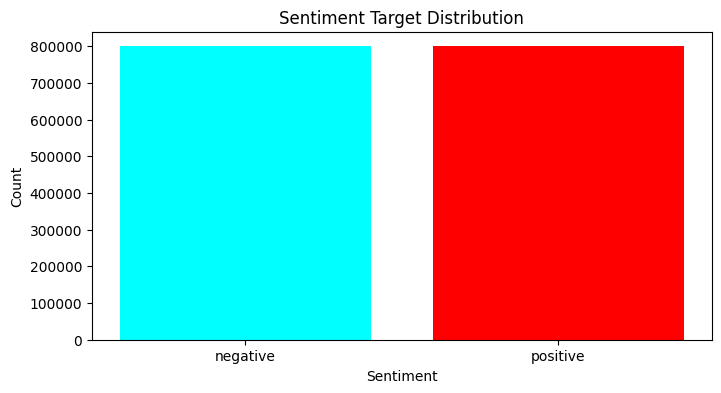

In [ ]:
#Creating a copy of the "sentiment" dataframe then replacing 0,4 values with negative/positive, then visualizing:
sentiment2 = sentiment
sentiment2.replace(to_replace = 0, value = 'negative', inplace = True)
sentiment2.replace(to_replace = 4, value = 'positive', inplace = True)
#Visualizing the target values and making sure they are balanced:
value_count = sentiment2.target.value_counts()
plt.figure(figsize=(8,4))
plt.bar(value_count.index, value_count.values , color = ['cyan', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Target Distribution")

## 2- Data Pre-processing:

<a name="clean-id"></a>
### Data cleaning (removing links, punctuations, numbers, mentions, stop words, etc):

In [ ]:
#Creating a copy of the dataset to prevent damaging the original dataset
sentiment2 = sentiment.copy()

In [ ]:
#Replacing 4 with 1
sentiment2['target'] = sentiment2['target'].replace(4,1)

In [ ]:
#Lowercasing the tweets:
sentiment2['tweet_modified']=sentiment2['tweet'].str.lower()
sentiment2['tweet_modified'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: tweet_modified, dtype: object

In [ ]:
# Removing links:
def links_removal(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+)|(http?://[^s]+))',' ',data)
sentiment2['tweet_modified'] = sentiment2['tweet_modified'].apply(lambda x: links_removal(x))
sentiment2['tweet_modified'].head()

0    @switchfoot  s a bummer.  you shoulda got davi...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: tweet_modified, dtype: object

In [ ]:
#Removing mentions:
def mentions_removal(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
sentiment2['tweet_modified'] = np.vectorize(mentions_removal)(sentiment2['tweet_modified'], "@[\w]*")
sentiment2['tweet_modified'].head()

0      s a bummer.  you shoulda got david carr of t...
1    is upset that he can't update his facebook by ...
2     i dived many times for the ball. managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: tweet_modified, dtype: object

In [ ]:
#Removing hashtags:
def hashtags_removal(text, pattern):
    finder = re.findall(pattern, text)
    for word in finder:
        text = re.sub(word, "", text)
    return text
sentiment2['tweet_modified'] = np.vectorize(mentions_removal)(sentiment2['tweet_modified'], "#[\w]*")
sentiment2['tweet_modified'].head()

0      s a bummer.  you shoulda got david carr of t...
1    is upset that he can't update his facebook by ...
2     i dived many times for the ball. managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: tweet_modified, dtype: object

In [ ]:
#Removing punctuations:
sentiment2['tweet_modified'] = sentiment2['tweet_modified'].str.replace("[^a-zA-Z#]", " ")
sentiment2['tweet_modified'].head()

<ipython-input-15-f65099b4b06e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sentiment2['tweet_modified'] = sentiment2['tweet_modified'].str.replace("[^a-zA-Z#]", " ")


0      s a bummer   you shoulda got david carr of t...
1    is upset that he can t update his facebook by ...
2     i dived many times for the ball  managed to s...
3      my whole body feels itchy and like its on fire 
4     no  it s not behaving at all  i m mad  why am...
Name: tweet_modified, dtype: object

In [ ]:
#Creating a list of stop words (175 words in the english language):
stopwords_list = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an', "i't",'s', 't', 'n', 'o', 'y' , 'n', 'm'
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before', 'during', 'b' , 'c', 'd', 'u', 'r', 'hw', 're' ,'ve' ,
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do', 'aren',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 'there', 'where',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'been', 'over' , 'many' , 'might',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'and' , 'hey',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once', 'out','outta',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
             'same', 'she', "shes", 'should', "should've",'so', 'some', 'such','shouldve',
             't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them','thatll', 'til',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'btw' , 'ffs' ,
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom', "i'm",'uv', "u'v",
             'why', 'will', 'with', 'won', 'y', 'you', "you'd","you'll", "you're", "could'nt", 'youd' , 'youll', 'youre','youve',
             "you've", 'your', 'yours', 'yourself', 'yourselves', 'shoulda' , 'coulda' , 'woulda' , 'imma' ,"can't" , 'cant']
stopwords_set = set(stopwords_list)

In [ ]:
#Removing stop words:
def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_set])
sentiment2['tweet_modified'] = sentiment2['tweet_modified'].apply(lambda text: stopwords_removal(text))
sentiment2['tweet_modified'].head()

0                      bummer got david carr third day
1    upset update facebook texting cry result schoo...
2         dived times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                              no not behaving mad see
Name: tweet_modified, dtype: object

In [ ]:
#Removing numbers:
def numbers_removal(text):
    return re.sub('[0-9]+', '', text)
sentiment2['tweet_modified'] = sentiment2['tweet_modified'].apply(lambda text: numbers_removal(text))
sentiment2['tweet_modified'].head()

0                      bummer got david carr third day
1    upset update facebook texting cry result schoo...
2         dived times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                              no not behaving mad see
Name: tweet_modified, dtype: object

In [ ]:
#Displaying the outcome of the previous steps:
sentiment2[["tweet","tweet_modified"]]

,tweet,tweet_modified
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",bummer got david carr third day
1,is upset that he can't update his Facebook by ...,upset update facebook texting cry result schoo...
2,@Kenichan I dived many times for the ball. Man...,dived times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",no not behaving mad see
...,...,...
1599995,Just woke up. Having no school is the best fee...,woke no school best feeling ever
1599996,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interviews
1599997,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details
1599998,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...


<a name="token-id"></a>
### Tokenization:

In [ ]:
sentiment3 = sentiment2.copy()
sentiment3['tweet_token'] = sentiment3['tweet_modified'].apply(lambda x: word_tokenize(x))
sentiment3[["tweet_modified","tweet_token"]]


,tweet_modified,tweet_token
0,bummer got david carr third day,"[bummer, got, david, carr, third, day]"
1,upset update facebook texting cry result schoo...,"[upset, update, facebook, texting, cry, result..."
2,dived times ball managed save rest go bounds,"[dived, times, ball, managed, save, rest, go, ..."
3,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,no not behaving mad see,"[no, not, behaving, mad, see]"
...,...,...
1599995,woke no school best feeling ever,"[woke, no, school, best, feeling, ever]"
1599996,thewdb com cool hear old walt interviews,"[thewdb, com, cool, hear, old, walt, interviews]"
1599997,ready mojo makeover ask details,"[ready, mojo, makeover, ask, details]"
1599998,happy th birthday boo alll time tupac amaru sh...,"[happy, th, birthday, boo, alll, time, tupac, ..."


<a name="stem-id"></a>
### Stemming:

In [ ]:
#Stemming words:
def stem_text(data):
    return [SnowballStemmer(language='english').stem(word) for word in data]
sentiment3['tweet_token_stem']= sentiment3['tweet_token'].apply(lambda x: stem_text(x))
sentiment3[["tweet_token","tweet_token_stem"]]

,tweet_token,tweet_token_stem
0,"[bummer, got, david, carr, third, day]","[bummer, got, david, carr, third, day]"
1,"[upset, update, facebook, texting, cry, result...","[upset, updat, facebook, text, cri, result, sc..."
2,"[dived, times, ball, managed, save, rest, go, ...","[dive, time, ball, manag, save, rest, go, bound]"
3,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,"[no, not, behaving, mad, see]","[no, not, behav, mad, see]"
...,...,...
1599995,"[woke, no, school, best, feeling, ever]","[woke, no, school, best, feel, ever]"
1599996,"[thewdb, com, cool, hear, old, walt, interviews]","[thewdb, com, cool, hear, old, walt, interview]"
1599997,"[ready, mojo, makeover, ask, details]","[readi, mojo, makeov, ask, detail]"
1599998,"[happy, th, birthday, boo, alll, time, tupac, ...","[happi, th, birthday, boo, alll, time, tupac, ..."


<a name="lemma-id"></a>
### Lemmatization:

In [ ]:
#Lemmatizing words:
nltk.download('wordnet')
def lemmatize_text(data):
    return [WordNetLemmatizer().lemmatize(word) for word in data]
sentiment3['tweet_token_stem_lemma'] = sentiment3['tweet_token_stem'].apply(lambda x: lemmatize_text(x))
sentiment3[["tweet_token_stem","tweet_token_stem_lemma"]]

[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet_token_stem,tweet_token_stem_lemma
0,"[bummer, got, david, carr, third, day]","[bummer, got, david, carr, third, day]"
1,"[upset, updat, facebook, text, cri, result, sc...","[upset, updat, facebook, text, cri, result, sc..."
2,"[dive, time, ball, manag, save, rest, go, bound]","[dive, time, ball, manag, save, rest, go, bound]"
3,"[whole, bodi, feel, itchi, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,"[no, not, behav, mad, see]","[no, not, behav, mad, see]"
...,...,...
1599995,"[woke, no, school, best, feel, ever]","[woke, no, school, best, feel, ever]"
1599996,"[thewdb, com, cool, hear, old, walt, interview]","[thewdb, com, cool, hear, old, walt, interview]"
1599997,"[readi, mojo, makeov, ask, detail]","[readi, mojo, makeov, ask, detail]"
1599998,"[happi, th, birthday, boo, alll, time, tupac, ...","[happi, th, birthday, boo, alll, time, tupac, ..."


In [ ]:
#Displaying the outcome of the previous steps:
sentiment3[["tweet","tweet_token_stem_lemma"]]

,tweet,tweet_token_stem_lemma
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[bummer, got, david, carr, third, day]"
1,is upset that he can't update his Facebook by ...,"[upset, updat, facebook, text, cri, result, sc..."
2,@Kenichan I dived many times for the ball. Man...,"[dive, time, ball, manag, save, rest, go, bound]"
3,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
4,"@nationwideclass no, it's not behaving at all....","[no, not, behav, mad, see]"
...,...,...
1599995,Just woke up. Having no school is the best fee...,"[woke, no, school, best, feel, ever]"
1599996,TheWDB.com - Very cool to hear old Walt interv...,"[thewdb, com, cool, hear, old, walt, interview]"
1599997,Are you ready for your MoJo Makeover? Ask me f...,"[readi, mojo, makeov, ask, detail]"
1599998,Happy 38th Birthday to my boo of alll time!!! ...,"[happi, th, birthday, boo, alll, time, tupac, ..."


## 3- Machine learning models development:

### Using TF-IDF feature extraction method to create vectors out of text:

In [ ]:
#Putting the tokens back together in one sentence:
sentiment4 = sentiment3.copy()
text_list = []
for tweet in sentiment4['tweet_token_stem_lemma']:
    text = " ".join(tweet)  # Assuming tweet is a list of words
    text_list.append(text)



In [ ]:
df = pd.DataFrame(text_list, columns = ['tweet'])
df2 = sentiment4[['target']]
sentiment5 = pd.concat([df, df2], axis=1, join='inner')
sentiment5.head()

,tweet,target
0,bummer got david carr third day,0
1,upset updat facebook text cri result school to...,0
2,dive time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,no not behav mad see,0


In [ ]:
#Sampling for computation reduction:
sentiment6 = sentiment5.sample(100000)

In [ ]:
sentiment6.target.value_counts()

0    50058
1    49942
Name: target, dtype: int64

In [ ]:
#Feature extraction with TF-IDF:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.75)
x = tfidf.fit_transform(sentiment6.tweet)
y = sentiment6.target

In [ ]:
#Splitting the dataset into a train and test subsets 70/30 split:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state =52)

<a name="log1-id"></a>
### Logistic Regression modelling:

In [ ]:
#Training the sentiment analysis model using Logistic Regression algorithm:

#Start time
start_time = time.time()

lr_tf = LogisticRegression(random_state=42)
lr_tf.fit(x_train, y_train)

#Testing the model on test data to obtain the accuracy:
y_pred_LR_tf = lr_tf.predict(x_test)

#Evaluating the performance of logistic regression model:
LR_accuracy_tf = accuracy_score(y_test, y_pred_LR_tf)
LR_classification_report = classification_report(y_test, y_pred_LR_tf)

#Displaying the model accuracy and report:
print("Logistic regression accuracy with TF-IDF:", LR_accuracy_tf)
print("Logistic regression classification report:\n", LR_classification_report)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

Logistic regression accuracy with TF-IDF: 0.7555
Logistic regression classification report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75     15024
           1       0.74      0.78      0.76     14976

    accuracy                           0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000

Training completed in 2.93 seconds (0.05 minutes)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a name="svm1-id"></a>
### Support Vector Machine modelling:

In [ ]:
#Training the sentiment analysis model using Support Vector Machine SVM algorithm:
#Start time
start_time = time.time()

SVM_tf = SVC(kernel='linear', random_state=42)
SVM_tf.fit(x_train, y_train)

#Testing the model on test data to obtain the accuracy:
y_pred_SVM_tf = SVM_tf.predict(x_test)

#Evaluating the performance of SVM model:
SVM_accuracy_tf = accuracy_score(y_test, y_pred_SVM_tf)
SVM_classification_report = classification_report(y_test, y_pred_SVM_tf)

#Displaying the model accuracy and report:
print("SVM accuracy with TF-IDF:", SVM_accuracy_tf)
print("SVM classification report:\n", SVM_classification_report)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

SVM accuracy with TF-IDF: 0.7478666666666667
SVM classification report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     14988
           1       0.73      0.78      0.76     15012

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000

Training completed in 1038.27 seconds (17.30 minutes)


<a name="nai1-id"></a>
### Random Forest modelling:

In [ ]:

# Training the sentiment analysis model using Random Forest algorithm:
#Start time
start_time = time.time()

RF_tf = RandomForestClassifier()
RF_tf.fit(x_train, y_train)

# Testing the model on test data to obtain the accuracy:
y_pred_RF_tf = RF_tf.predict(x_test)

# Evaluating the performance of Random Forest model:
RF_accuracy_tf = accuracy_score(y_test, y_pred_RF_tf)
RF_classification_report = classification_report(y_test, y_pred_RF_tf)

# Displaying the model accuracy and report:
print("Random Forest accuracy with TF-IDF:", RF_accuracy_tf)
print("Random Forest classification report:\n", RF_classification_report)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

Random Forest accuracy with TF-IDF: 0.7445333333333334
Random Forest classification report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     14988
           1       0.73      0.77      0.75     15012

    accuracy                           0.74     30000
   macro avg       0.75      0.74      0.74     30000
weighted avg       0.75      0.74      0.74     30000

Training completed in 739.01 seconds (12.32 minutes)


<a name="viz1-id"></a>
### Visual comparison of the accuracies:

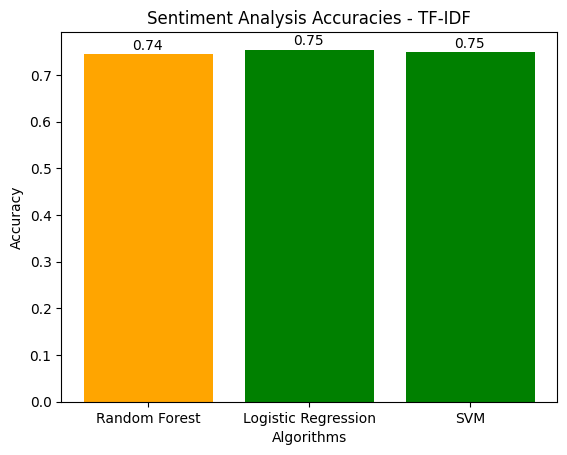

In [ ]:
x = np.arange(3)
accuracies = [RF_accuracy_tf, LR_accuracy_tf, SVM_accuracy_tf]
plt.bar(x, accuracies, color=['orange', 'green', 'green'])

# Add accuracy values to the top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, str(round(v,2)), fontsize=10)

# Add chart title and labels
plt.title("Sentiment Analysis Accuracies - TF-IDF")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

# Customize x-axis ticks and labels
plt.xticks(x, ["Random Forest", "Logistic Regression", "SVM"])

# Display the chart
plt.show()


### Using Word2Vec feature extraction method to create vectors out of text:

In [ ]:
#Specify the path to the saved Word2Vec model in Google Drive:
drive.mount('/content/drive')
model_load_path = '/content/drive/My Drive/word2vec-google-news-300.bin'

#Load the Word2Vec model:
word2vec_model = KeyedVectors.load_word2vec_format(model_load_path, binary=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Making a copy of the dataset for freedom of manipulation:
sentiment7 = sentiment3.copy()

In [ ]:
#Sampling for computation reduction:
sentiment8 = sentiment7.sample(100000)

#Convert tweets to word embeddings
tweet_embeddings = []
for tweet_tokens in sentiment8['tweet_token_stem_lemma']:
    embeddings = [word2vec_model[token] for token in tweet_tokens if token in word2vec_model.index_to_key]
    if embeddings:
        tweet_embedding = np.mean(embeddings, axis=0)
    else:
        tweet_embedding = np.zeros(word2vec_model.vector_size)  # Handle if no words in vocabulary
    tweet_embeddings.append(tweet_embedding)

In [ ]:
#Convert tweet_embeddings to numpy array
x = np.array(tweet_embeddings)
y = sentiment8['target']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<a name="log2-id"></a>
### Logistic Regression v2 modelling:

In [ ]:
#Training the sentiment analysis model using Logistic Regression algorithm:
#Start time:
start_time = time.time()

lr_w2v = LogisticRegression(random_state=42)
lr_w2v.fit(x_train, y_train)

#Testing the model on test data to obtain the accuracy:
y_pred_LR_w2v = lr_w2v.predict(x_test)

#Evaluating the performance of logistic regression model:
LR_accuracy_w2v = accuracy_score(y_test, y_pred_LR_w2v)
LR_classification_report_w2v = classification_report(y_test, y_pred_LR_w2v)

#Displaying the model accuracy and report:
print("Logistic regression accuracy with Word2Vec:", LR_accuracy_w2v)
print("Logistic regression classification report:\n", LR_classification_report_w2v)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

Logistic regression accuracy with Word2Vec: 0.7283666666666667
Logistic regression classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73     15035
           1       0.73      0.73      0.73     14965

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000

Training completed in 3.50 seconds (0.06 minutes)


<a name="svm2-id"></a>
### Support Vector Machines v2 modelling:

In [ ]:
#Training the sentiment analysis model using Support Vector Machine SVM algorithm:
#Start time:
start_time = time.time()

SVM_w2v = SVC(kernel='linear', random_state=42)
SVM_w2v.fit(x_train, y_train)

#Testing the model on test data to obtain the accuracy:
y_pred_SVM_w2v = SVM_w2v.predict(x_test)

#Evaluating the performance of SVM model:
SVM_accuracy_w2v = accuracy_score(y_test, y_pred_SVM_w2v)
SVM_classification_report_w2v = classification_report(y_test, y_pred_SVM_w2v)

#Displaying the model accuracy and report:
print("SVM accuracy with TF-IDF:", SVM_accuracy_w2v)
print("SVM classification report:\n", SVM_classification_report_w2v)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

SVM accuracy with TF-IDF: 0.7278
SVM classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73     15035
           1       0.72      0.73      0.73     14965

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000

Training completed in 2122.52 seconds (35.38 minutes)


<a name="rand2-id"></a>
### Random Forest v2 modelling:

In [ ]:
#Training the sentiment analysis model using Random Forest algorithm:
#Start time:
start_time = time.time()

RF_w2v = RandomForestClassifier()
RF_w2v.fit(x_train, y_train)

#Testing the model on test data to obtain the accuracy:
y_pred_RF_w2v = RF_w2v.predict(x_test)

#Evaluating the performance of Random Forest model:
RF_accuracy_w2v = accuracy_score(y_test, y_pred_RF_w2v)
RF_classification_report_w2v = classification_report(y_test, y_pred_RF_w2v)

#Displaying the model accuracy and report:
print("Random Forest accuracy with Word2Vec:", RF_accuracy_w2v)
print("Random Forest classification report:\n", RF_classification_report_w2v)

#End time
end_time = time.time()

#Calculate the runtime
runtime_seconds = end_time - start_time
runtime_minutes = runtime_seconds / 60

print("Training completed in {:.2f} seconds ({:.2f} minutes)".format(runtime_seconds, runtime_minutes))

Random Forest accuracy with Word2Vec: 0.7042666666666667
Random Forest classification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71     15035
           1       0.71      0.69      0.70     14965

    accuracy                           0.70     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.70      0.70      0.70     30000

Training completed in 195.64 seconds (3.26 minutes)


<a name="viz2-id"></a>
### Visual comparison of the accuracies v2:

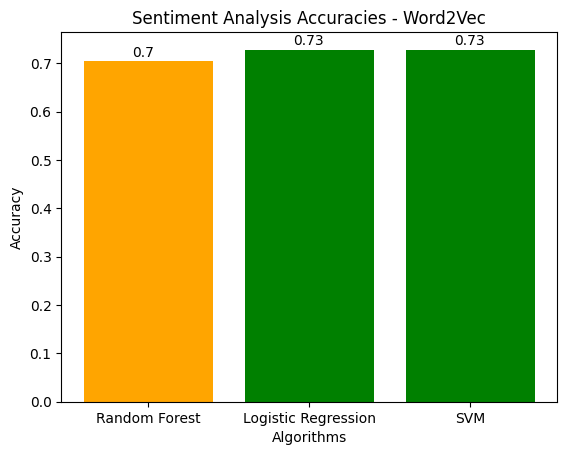

In [ ]:
x = np.arange(3)
accuracies = [RF_accuracy_w2v, LR_accuracy_w2v, SVM_accuracy_w2v]
plt.bar(x, accuracies, color=['orange', 'green', 'green'])

# Add accuracy values to the top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, str(round(v,2)), fontsize=10)

# Add chart title and labels
plt.title("Sentiment Analysis Accuracies - Word2Vec")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

# Customize x-axis ticks and labels
plt.xticks(x, ["Random Forest", "Logistic Regression", "SVM"])

# Display the chart
plt.show()